In [61]:
import re
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from natsort import natsorted

sns.set_context("talk")

In [62]:
METRICS_CSV = Path("/Users/danie/repos/alpaca-segmentation/data_postprocessing/BENCHMARK/metrics_cnn.csv")  # adjust if saved elsewhere
assert METRICS_CSV.exists(), f"{METRICS_CSV} not found"

In [63]:

# Load the metrics CSV
df = pd.read_csv(METRICS_CSV)

df = df.set_index(["model", "variant"])
df = df.loc[natsorted(df.index)].reset_index()

def parse_variant_tag(tag: str):
    """return seq_len (ms), hop (ms), threshold (float)"""
    m = re.match(r"len(\d+)_hop(\d+)_th(\d+)", tag)
    if not m:
        return None, None, None
    seq = int(m[1]) / 1000  # back to s
    hop = int(m[2]) / 1000
    th = int(m[3]) / 100
    return seq, hop, th

df[["seq_len_s", "hop_s", "threshold"]] = (
    df["variant"].apply(lambda t: pd.Series(parse_variant_tag(t)))
)

In [64]:
leader_cols = [
    "model",
    "variant",
    "precision",
    "recall",
    "f1",
    "mean_dstart_ms",
    "mean_dend_ms",
]
leader = df[leader_cols].sort_values("f1", ascending=False)
leader.head(50)

,model,variant,precision,recall,f1,mean_dstart_ms,mean_dend_ms
17,v2_quality_and_clipwise_balanced_nph_1,len400_hop050_th90,0.024740,0.381215,0.046465,236.797101,236.753623
26,v3_quality_balanced_nph_1,len400_hop050_th90,0.023373,0.436464,0.044370,234.037975,185.531646
35,v4_random_nph_1,len400_hop050_th90,0.015294,0.403315,0.029471,244.273973,227.027397
8,v1_clipwise_balanced_nph_1,len400_hop050_th90,0.014871,0.563536,0.028977,201.627451,121.176471
25,v3_quality_balanced_nph_1,len400_hop050_th80,0.012430,0.381215,0.024075,276.956522,221.304348
7,v1_clipwise_balanced_nph_1,len400_hop050_th80,0.011255,0.486188,0.022000,235.159091,158.113636
16,v2_quality_and_clipwise_balanced_nph_1,len400_hop050_th80,0.011027,0.353591,0.021387,248.609375,255.062500
6,v1_clipwise_balanced_nph_1,len400_hop050_th70,0.009644,0.453039,0.018885,236.963415,172.939024
24,v3_quality_balanced_nph_1,len400_hop050_th70,0.008798,0.337017,0.017149,266.868852,238.163934
5,v1_clipwise_balanced_nph_1,len400_hop050_th60,0.008610,0.436464,0.016888,246.000000,176.518987


In [65]:
filtered_df = df[df["variant"].str.endswith(("_th70", "_th80", "_th90"))]
filtered_leader = filtered_df[leader_cols].sort_values("recall", ascending=False)
filtered_leader.head(50)

,model,variant,precision,recall,f1,mean_dstart_ms,mean_dend_ms
8,v1_clipwise_balanced_nph_1,len400_hop050_th90,0.014871,0.563536,0.028977,201.627451,121.176471
7,v1_clipwise_balanced_nph_1,len400_hop050_th80,0.011255,0.486188,0.022000,235.159091,158.113636
6,v1_clipwise_balanced_nph_1,len400_hop050_th70,0.009644,0.453039,0.018885,236.963415,172.939024
26,v3_quality_balanced_nph_1,len400_hop050_th90,0.023373,0.436464,0.044370,234.037975,185.531646
35,v4_random_nph_1,len400_hop050_th90,0.015294,0.403315,0.029471,244.273973,227.027397
17,v2_quality_and_clipwise_balanced_nph_1,len400_hop050_th90,0.024740,0.381215,0.046465,236.797101,236.753623
25,v3_quality_balanced_nph_1,len400_hop050_th80,0.012430,0.381215,0.024075,276.956522,221.304348
16,v2_quality_and_clipwise_balanced_nph_1,len400_hop050_th80,0.011027,0.353591,0.021387,248.609375,255.062500
24,v3_quality_balanced_nph_1,len400_hop050_th70,0.008798,0.337017,0.017149,266.868852,238.163934
15,v2_quality_and_clipwise_balanced_nph_1,len400_hop050_th70,0.007174,0.325967,0.014039,255.254237,268.508475


### Recall vs. threshold for each model

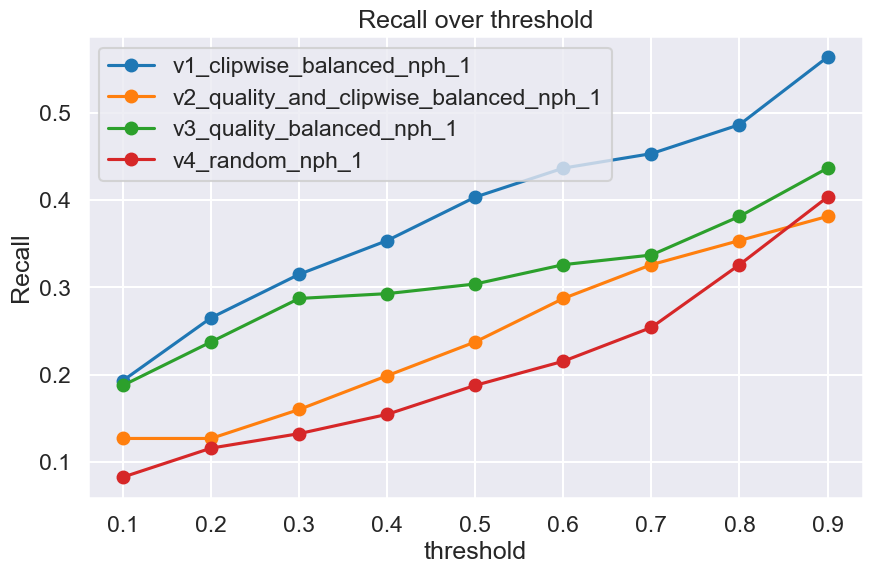

In [66]:
plt.figure(figsize=(10, 6))
for model, sub in df.groupby("model"):
    sub_sorted = sub.sort_values("threshold")
    plt.plot(sub_sorted["threshold"], sub_sorted["recall"], "-o", label=model)
plt.xlabel("threshold")
plt.ylabel("Recall")
plt.title("Recall over threshold")
plt.legend()
plt.grid(True)
plt.show()

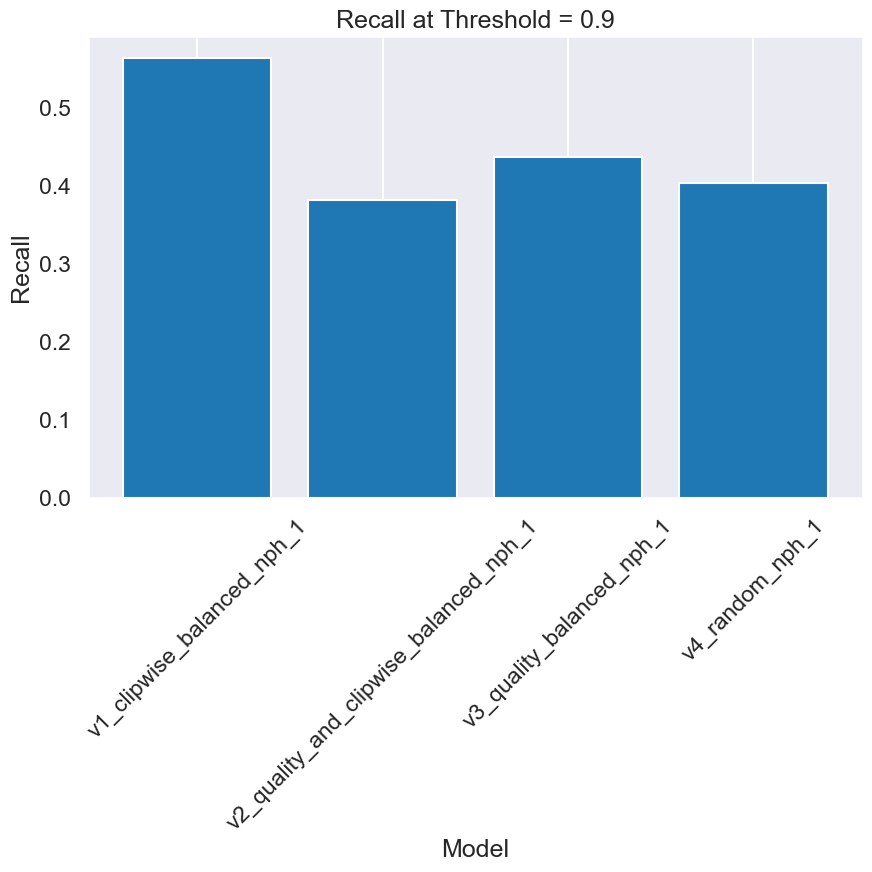

In [67]:
df_th90 = df[df["threshold"] == 0.9]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_th90["model"], df_th90["recall"])
plt.xlabel("Model")
plt.ylabel("Recall")
plt.title("Recall at Threshold = 0.9")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

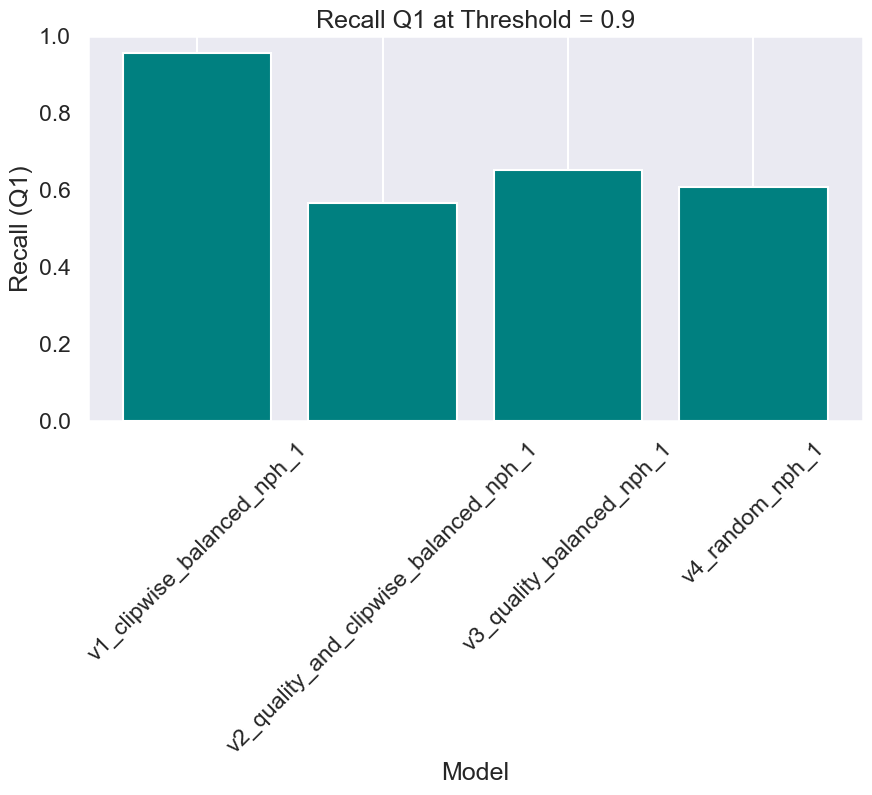

In [68]:
plt.figure(figsize=(10, 5))
plt.bar(df_th90["model"], df_th90["recall_q1"], color="teal")
plt.title("Recall Q1 at Threshold = 0.9")
plt.xlabel("Model")
plt.ylabel("Recall (Q1)")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

## Recall vs. threshold for each quality (Q1–Q3)

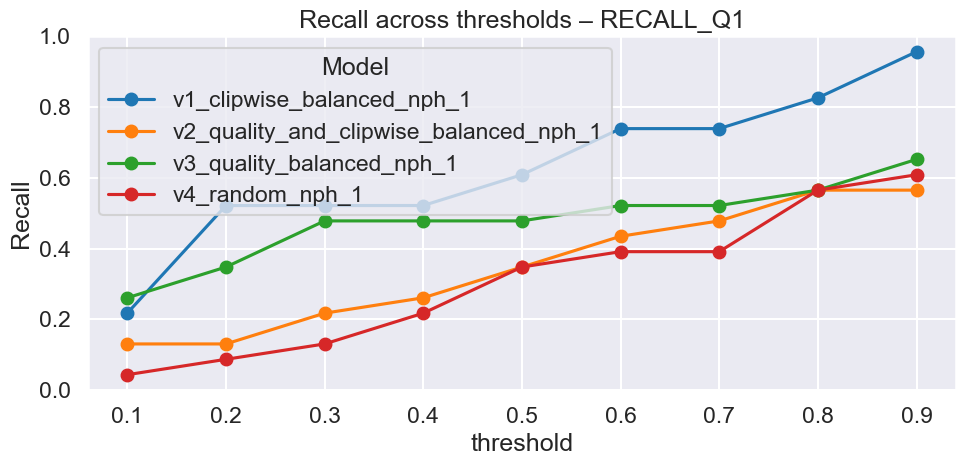

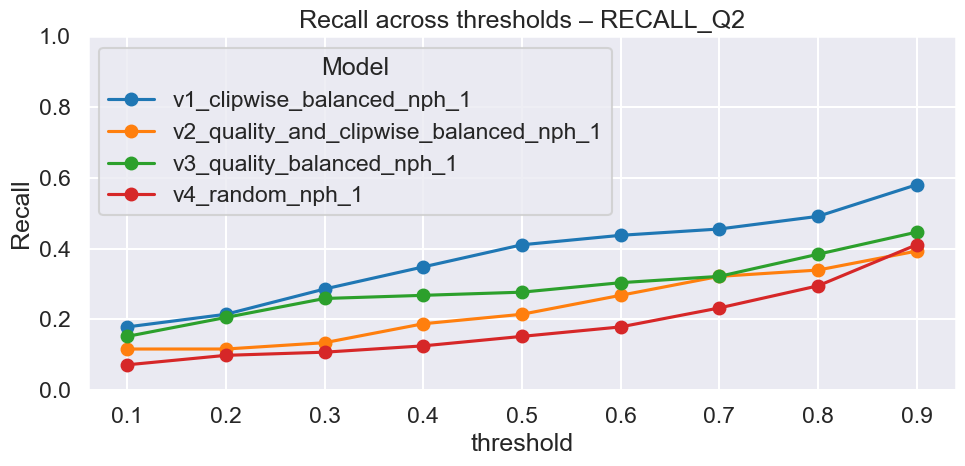

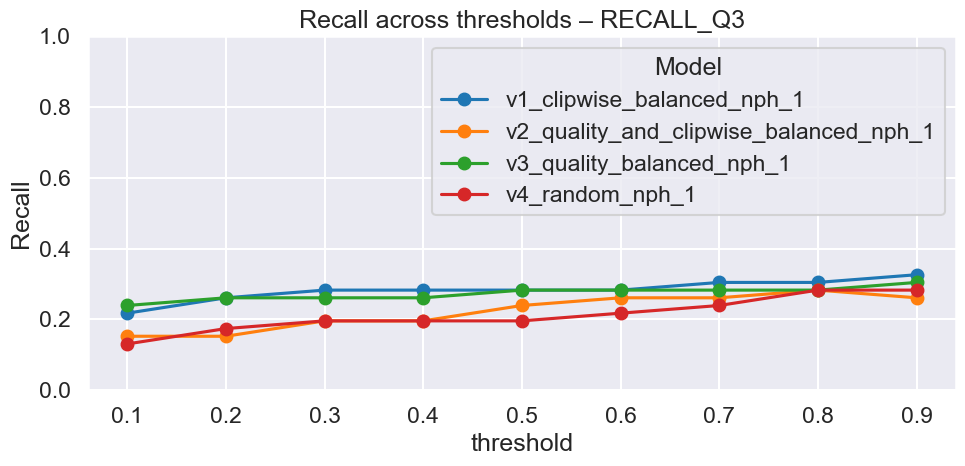

In [69]:
qualities = ["recall_q1", "recall_q2", "recall_q3"]

for q in qualities:
    if q in df.columns:
        plt.figure(figsize=(10, 5))
        for model, sub in df.groupby("model"):
            sub_sorted = sub.sort_values("threshold")
            plt.plot(
                sub_sorted["threshold"],
                sub_sorted[q],
                marker="o",
                label=model
            )
        plt.title(f"Recall across thresholds – {q.upper()}")
        plt.xlabel("threshold")
        plt.ylabel("Recall")
        plt.ylim(0, 1)
        plt.grid(True)
        plt.legend(title="Model")
        plt.tight_layout()
        plt.show()

### Detected calls vs. threshold (log scale)

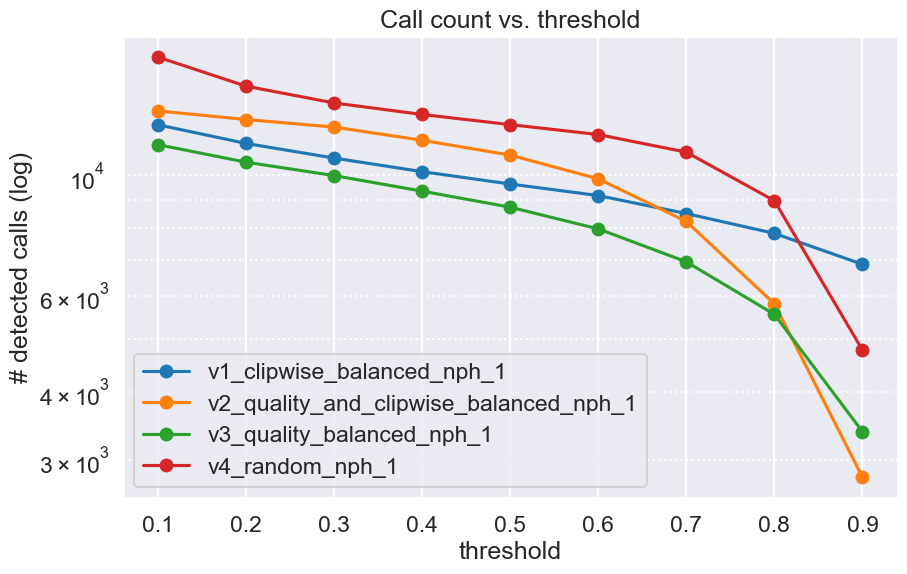

In [70]:
plt.figure(figsize=(10, 6))
for model, sub in df.groupby("model"):
    sub_sorted = sub.sort_values("threshold")
    plt.plot(sub_sorted["threshold"], sub_sorted["n_pred"], "-o", label=model)
plt.xlabel("threshold")
plt.ylabel("# detected calls (log)")
plt.yscale("log")
plt.title("Call count vs. threshold")
plt.legend()
plt.grid(True, which="both", axis="y", linestyle=":")
plt.show()

### Top‑5 variants by F1

In [71]:
leader.head(5).style.format({"precision": "{:.2%}", "recall": "{:.2%}", "f1": "{:.2%}"})

,model,variant,precision,recall,f1,mean_dstart_ms,mean_dend_ms
17,v2_quality_and_clipwise_balanced_nph_1,len400_hop050_th90,2.47%,38.12%,4.65%,236.797101,236.753623
26,v3_quality_balanced_nph_1,len400_hop050_th90,2.34%,43.65%,4.44%,234.037975,185.531646
35,v4_random_nph_1,len400_hop050_th90,1.53%,40.33%,2.95%,244.273973,227.027397
8,v1_clipwise_balanced_nph_1,len400_hop050_th90,1.49%,56.35%,2.90%,201.627451,121.176471
25,v3_quality_balanced_nph_1,len400_hop050_th80,1.24%,38.12%,2.41%,276.956522,221.304348


### F1 vs. threshold curve for each model

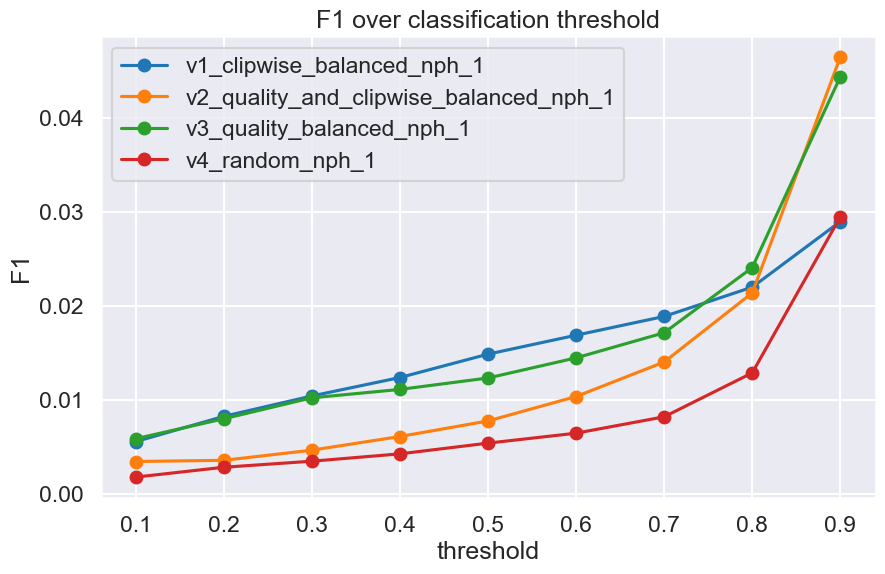

In [72]:
plt.figure(figsize=(10, 6))
for model, sub in df.groupby("model"):
    sub_sorted = sub.sort_values("threshold")
    plt.plot(sub_sorted["threshold"], sub_sorted["f1"], "-o", label=model)
plt.xlabel("threshold")
plt.ylabel("F1")
plt.title("F1 over classification threshold")
plt.legend()
plt.grid(True)
plt.show()

### Boundary error distributions

/var/folders/yy/mfzpfh1n7vsdd7qnk0wl69700000gn/T/ipykernel_42570/2382098644.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/yy/mfzpfh1n7vsdd7qnk0wl69700000gn/T/ipykernel_42570/2382098644.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


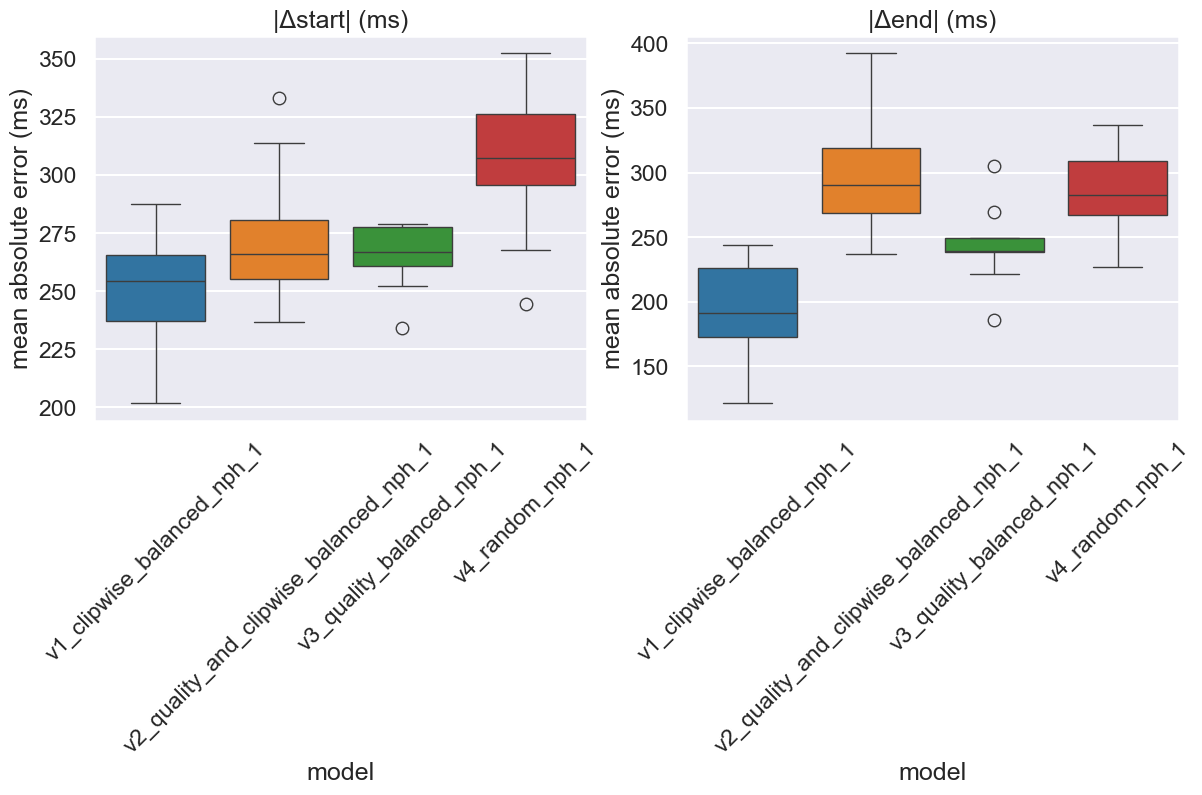

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically get unique model names in the order they appear
model_order = df["model"].unique()

# Generate a color palette with as many colors as there are models
custom_palette = sns.color_palette("tab10", n_colors=len(model_order))
palette_dict = dict(zip(model_order, custom_palette))

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(
    x="model",
    y="mean_dstart_ms",
    data=df,
    ax=axs[0],
    palette=palette_dict,
    order=model_order
)
axs[0].set_title("|Δstart| (ms)")
axs[0].set_ylabel("mean absolute error (ms)")
axs[0].tick_params(axis='x', rotation=45)

sns.boxplot(
    x="model",
    y="mean_dend_ms",
    data=df,
    ax=axs[1],
    palette=palette_dict,
    order=model_order
)
axs[1].set_title("|Δend| (ms)")
axs[1].set_ylabel("mean absolute error (ms)")
axs[1].tick_params(axis='x', rotation=45)

#plt.tight_layout()
plt.show()

In [74]:
# ---- helpers for convenience ----
def leaderboard(metric: str, top=50, df_=None):
    """Return a compact leaderboard sorted by the chosen metric."""
    if df_ is None:
        df_ = df
    cols = [
        "model", "variant", "layer",
        "precision", "recall", "f1",
        "mean_dstart_ms", "mean_dend_ms",
    ]
    have = [c for c in cols if c in df_.columns]
    return df_[have].sort_values(metric, ascending=False).head(top)

def _line_per_model_or_layer(ax, subdf, y, title, share_ylim=(0,1)):
    """Lineplot over threshold for each (model, layer)."""
    group_keys = ["model", "layer"] if "layer" in subdf.columns else ["model"]
    for key, g in subdf.groupby(group_keys):
        label = " • ".join(key) if isinstance(key, tuple) else key
        g = g.sort_values("threshold")
        ax.plot(g["threshold"], g[y], "-o", label=label)
    ax.set_title(title)
    ax.set_xlabel("threshold")
    ax.set_ylabel(y.capitalize())
    if share_ylim:
        ax.set_ylim(*share_ylim)
    ax.grid(True)

def _bar_by_model(ax, subdf, y, title):
    """Bar chart for one metric for each model (and layer if present)."""
    xlab = "model"
    if "layer" in subdf.columns:
        subdf = subdf.copy()
        subdf[xlab] = subdf["model"].astype(str) + " (" + subdf["layer"].astype(str) + ")"
    ax.bar(subdf[xlab], subdf[y])
    ax.set_title(title)
    ax.set_xlabel("Model")
    ax.set_ylabel(y.capitalize())
    ax.set_xticks(range(len(subdf)))
    ax.set_xticklabels(subdf[xlab], rotation=45, ha="right")
    ax.grid(axis="y")

In [75]:
# Top-k by each metric
leader_precision = leaderboard("precision", top=50)
leader_recall    = leaderboard("recall",    top=50)
leader_f1        = leaderboard("f1",        top=50)

leader_precision.style.format({"precision": "{:.2%}", "recall": "{:.2%}", "f1": "{:.2%}"})

,model,variant,layer,precision,recall,f1,mean_dstart_ms,mean_dend_ms
17,v2_quality_and_clipwise_balanced_nph_1,len400_hop050_th90,evaluation,2.47%,38.12%,4.65%,236.797101,236.753623
26,v3_quality_balanced_nph_1,len400_hop050_th90,evaluation,2.34%,43.65%,4.44%,234.037975,185.531646
35,v4_random_nph_1,len400_hop050_th90,evaluation,1.53%,40.33%,2.95%,244.273973,227.027397
8,v1_clipwise_balanced_nph_1,len400_hop050_th90,evaluation,1.49%,56.35%,2.90%,201.627451,121.176471
25,v3_quality_balanced_nph_1,len400_hop050_th80,evaluation,1.24%,38.12%,2.41%,276.956522,221.304348
7,v1_clipwise_balanced_nph_1,len400_hop050_th80,evaluation,1.13%,48.62%,2.20%,235.159091,158.113636
16,v2_quality_and_clipwise_balanced_nph_1,len400_hop050_th80,evaluation,1.10%,35.36%,2.14%,248.609375,255.062500
6,v1_clipwise_balanced_nph_1,len400_hop050_th70,evaluation,0.96%,45.30%,1.89%,236.963415,172.939024
24,v3_quality_balanced_nph_1,len400_hop050_th70,evaluation,0.88%,33.70%,1.71%,266.868852,238.163934
5,v1_clipwise_balanced_nph_1,len400_hop050_th60,evaluation,0.86%,43.65%,1.69%,246.000000,176.518987


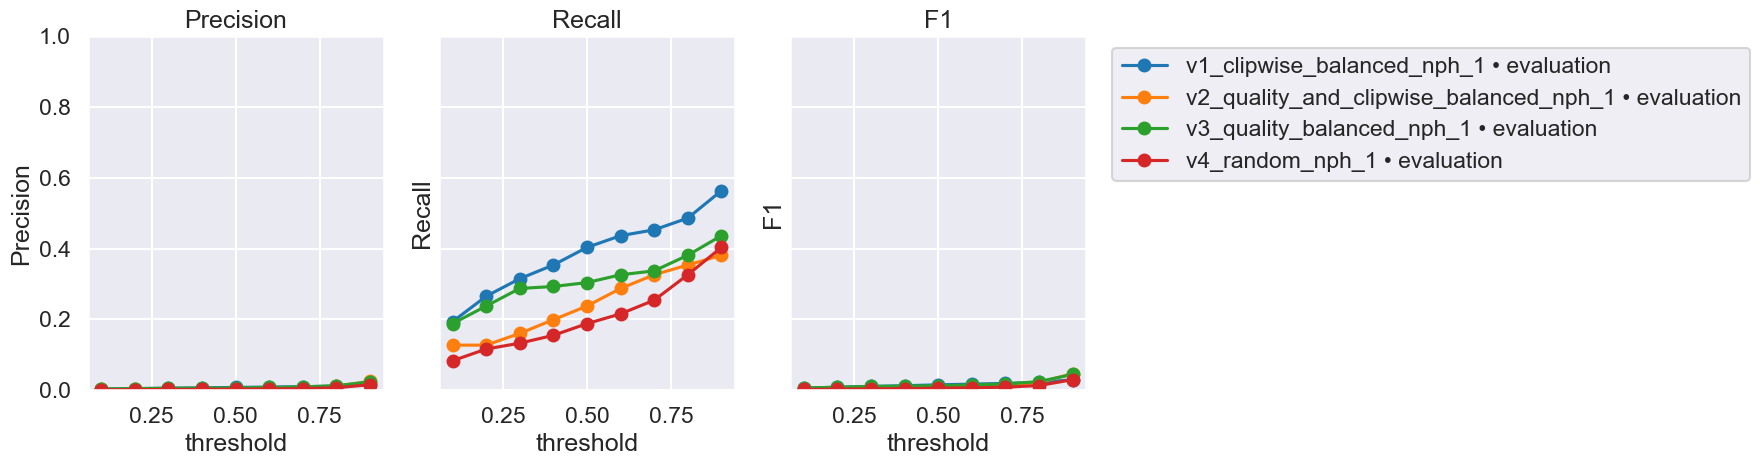

In [76]:
metrics = ["precision", "recall", "f1"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
for ax, m in zip(axes, metrics):
    _line_per_model_or_layer(ax, df, y=m, title=m.capitalize(), share_ylim=(0,1))

# Put legend only once, outside the last axis
handles, labels = axes[-1].get_legend_handles_labels()
axes[-1].legend(handles, labels, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

/var/folders/yy/mfzpfh1n7vsdd7qnk0wl69700000gn/T/ipykernel_42570/516024296.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


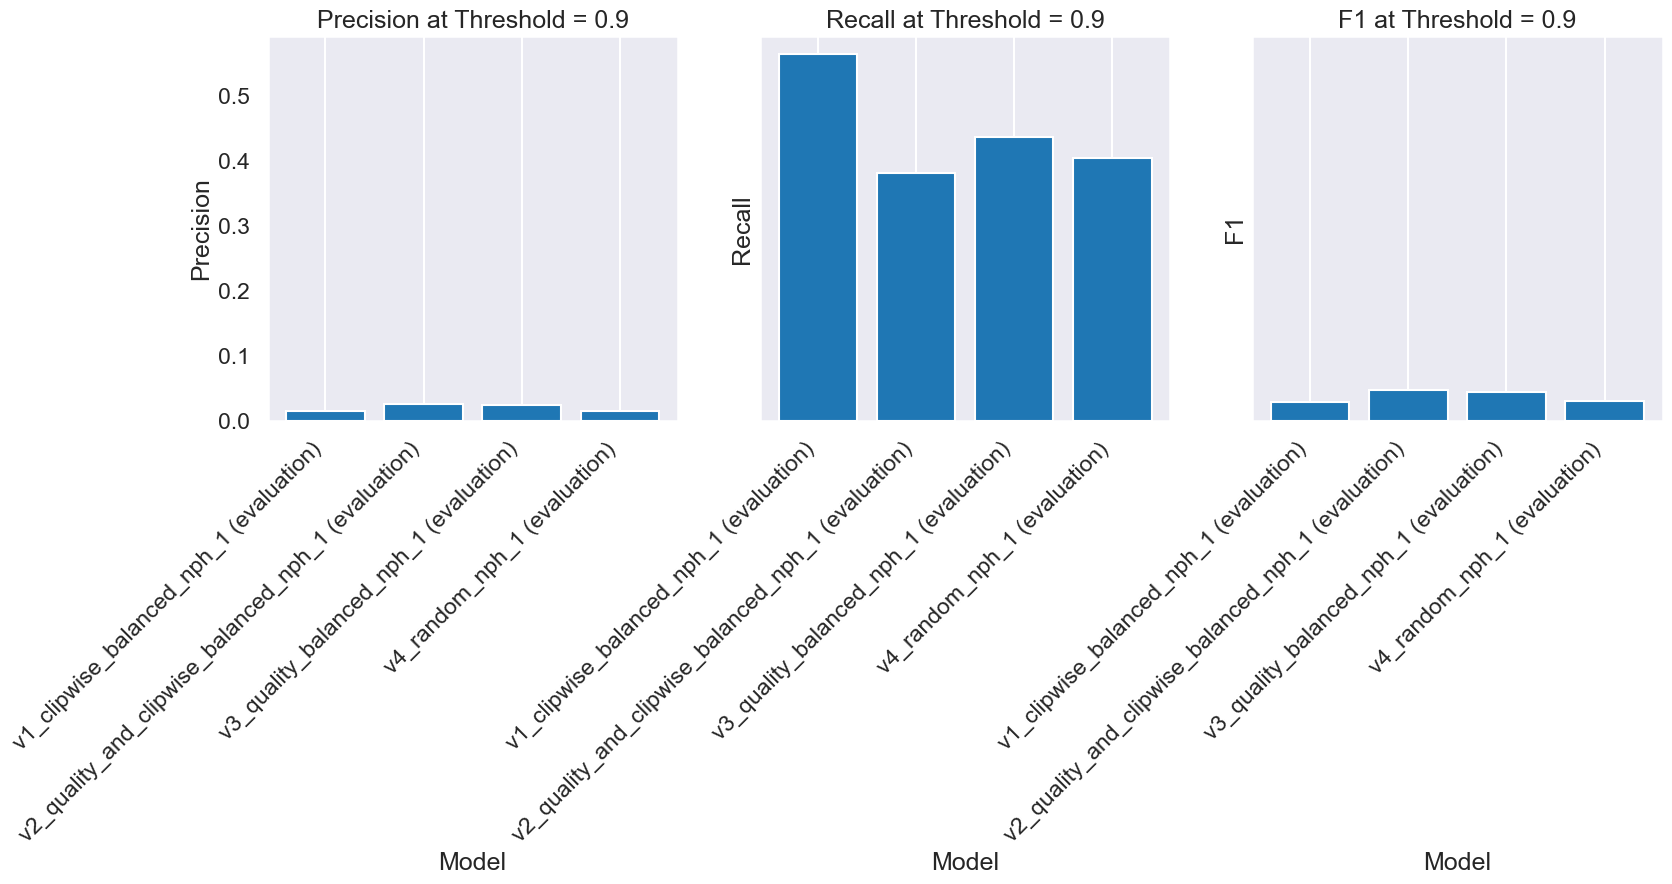

In [77]:
df_th90 = df[df["threshold"] == 0.9]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for ax, m in zip(axes, ["precision", "recall", "f1"]):
    _bar_by_model(ax, df_th90, y=m, title=f"{m.capitalize()} at Threshold = 0.9")

plt.tight_layout()
plt.show()

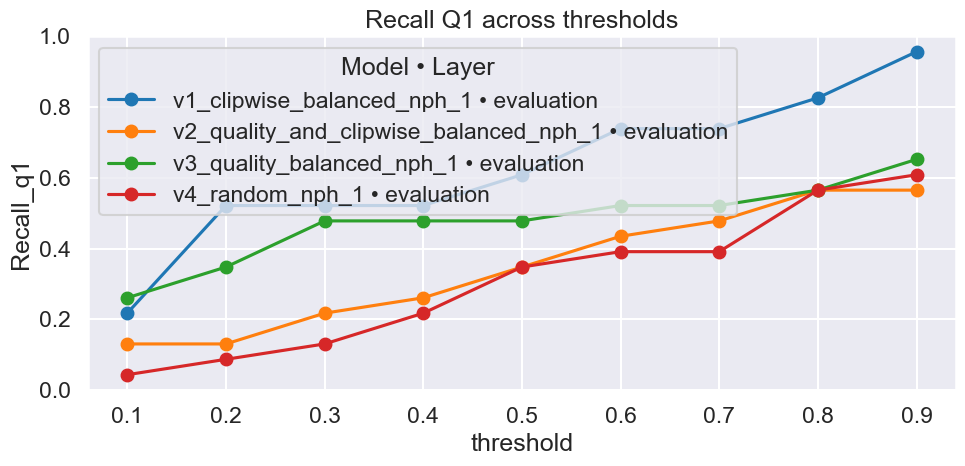

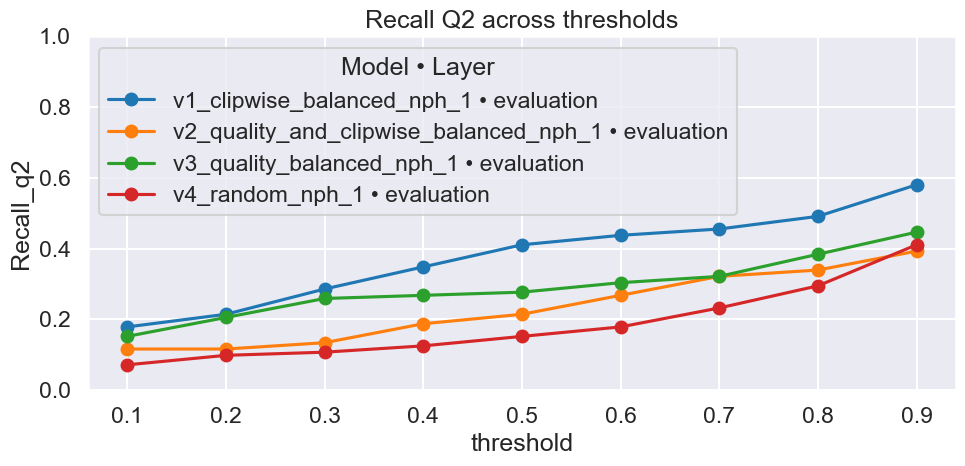

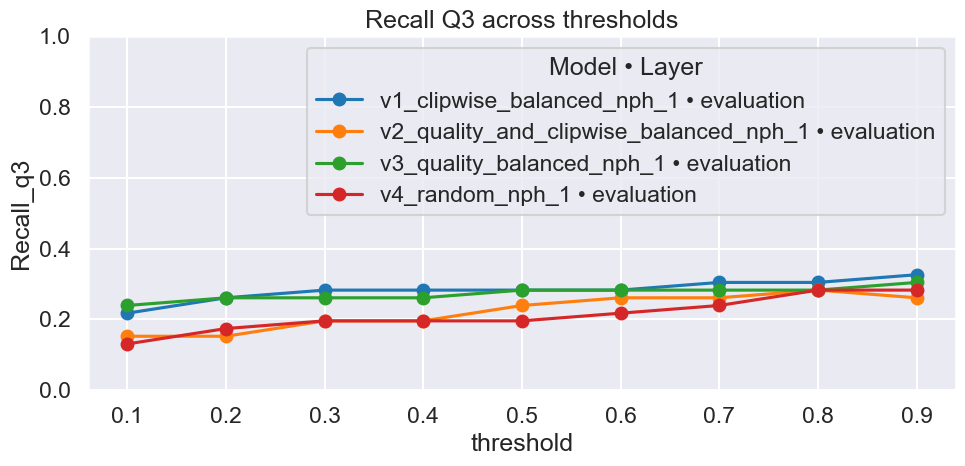

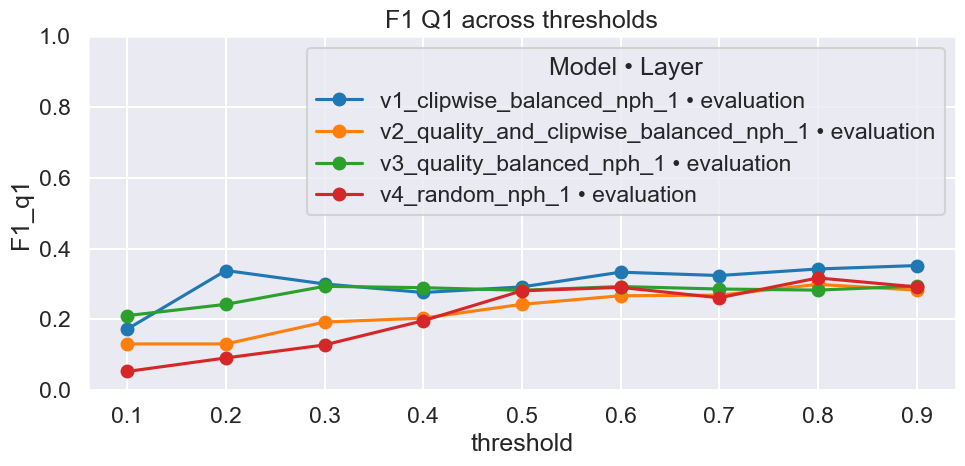

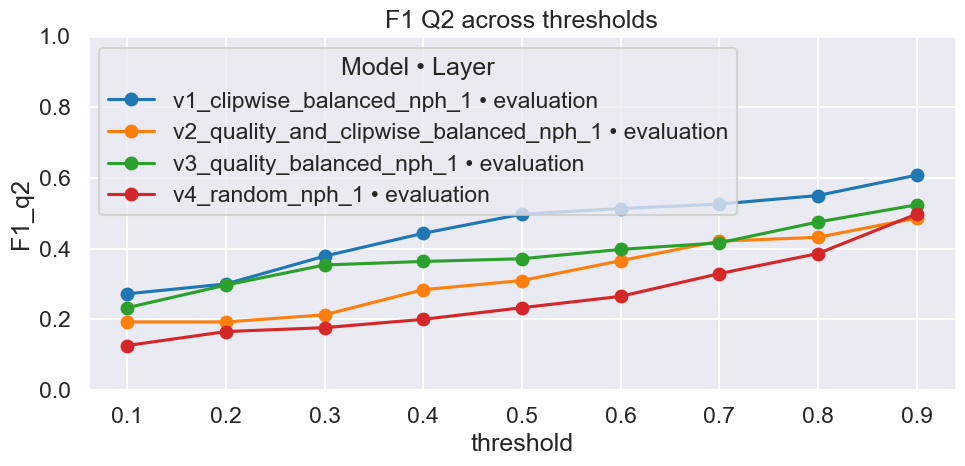

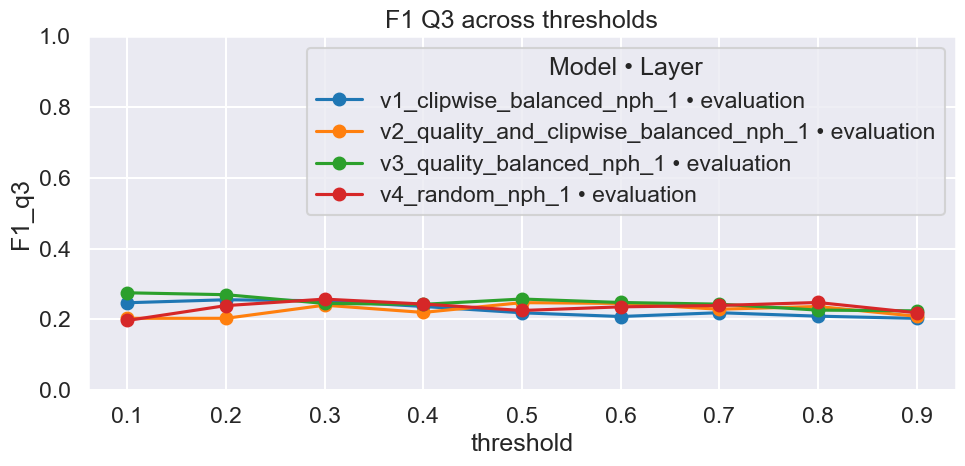

In [78]:
qualities = [("recall_q1", "Recall Q1"), ("recall_q2", "Recall Q2"), ("recall_q3", "Recall Q3"),
             ("f1_q1", "F1 Q1"), ("f1_q2", "F1 Q2"), ("f1_q3", "F1 Q3")]

for col, title in qualities:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        _line_per_model_or_layer(plt.gca(), df, y=col, title=f"{title} across thresholds", share_ylim=(0,1))
        plt.legend(title="Model • Layer")
        plt.tight_layout()
        plt.show()

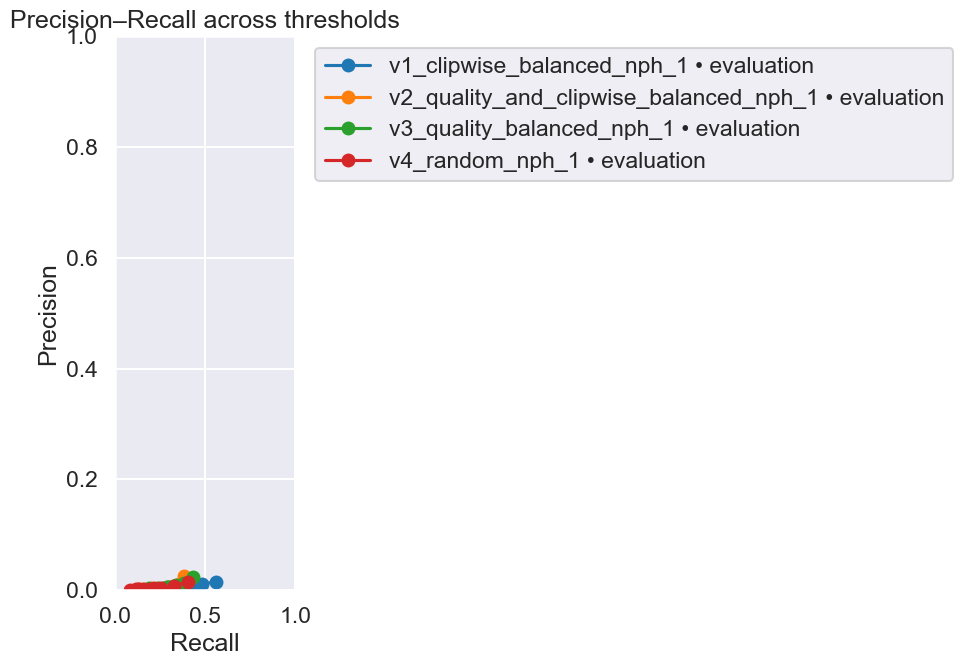

In [79]:
plt.figure(figsize=(10, 7))
group_keys = ["model", "layer"] if "layer" in df.columns else ["model"]
for key, g in df.groupby(group_keys):
    label = " • ".join(key) if isinstance(key, tuple) else key
    g = g.sort_values("threshold")
    plt.plot(g["recall"], g["precision"], "-o", label=label)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall across thresholds")
plt.xlim(0, 1); plt.ylim(0, 1)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [80]:
# Best by F1 per (model, layer)
best_f1 = (df.sort_values(["model", "layer", "f1"], ascending=[True, True, False])
             .groupby(["model", "layer"], as_index=False).first())
best_precision = (df.sort_values(["model", "layer", "precision"], ascending=[True, True, False])
                    .groupby(["model", "layer"], as_index=False).first())
best_recall = (df.sort_values(["model", "layer", "recall"], ascending=[True, True, False])
                 .groupby(["model", "layer"], as_index=False).first())

# Display compact tables
best_f1[["model","layer","variant","threshold","precision","recall","f1"]].sort_values("f1", ascending=False).head(20)

,model,layer,variant,threshold,precision,recall,f1
1,v2_quality_and_clipwise_balanced_nph_1,evaluation,len400_hop050_th90,0.9,0.024740,0.381215,0.046465
2,v3_quality_balanced_nph_1,evaluation,len400_hop050_th90,0.9,0.023373,0.436464,0.044370
3,v4_random_nph_1,evaluation,len400_hop050_th90,0.9,0.015294,0.403315,0.029471
0,v1_clipwise_balanced_nph_1,evaluation,len400_hop050_th90,0.9,0.014871,0.563536,0.028977


/var/folders/yy/mfzpfh1n7vsdd7qnk0wl69700000gn/T/ipykernel_42570/3551076614.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


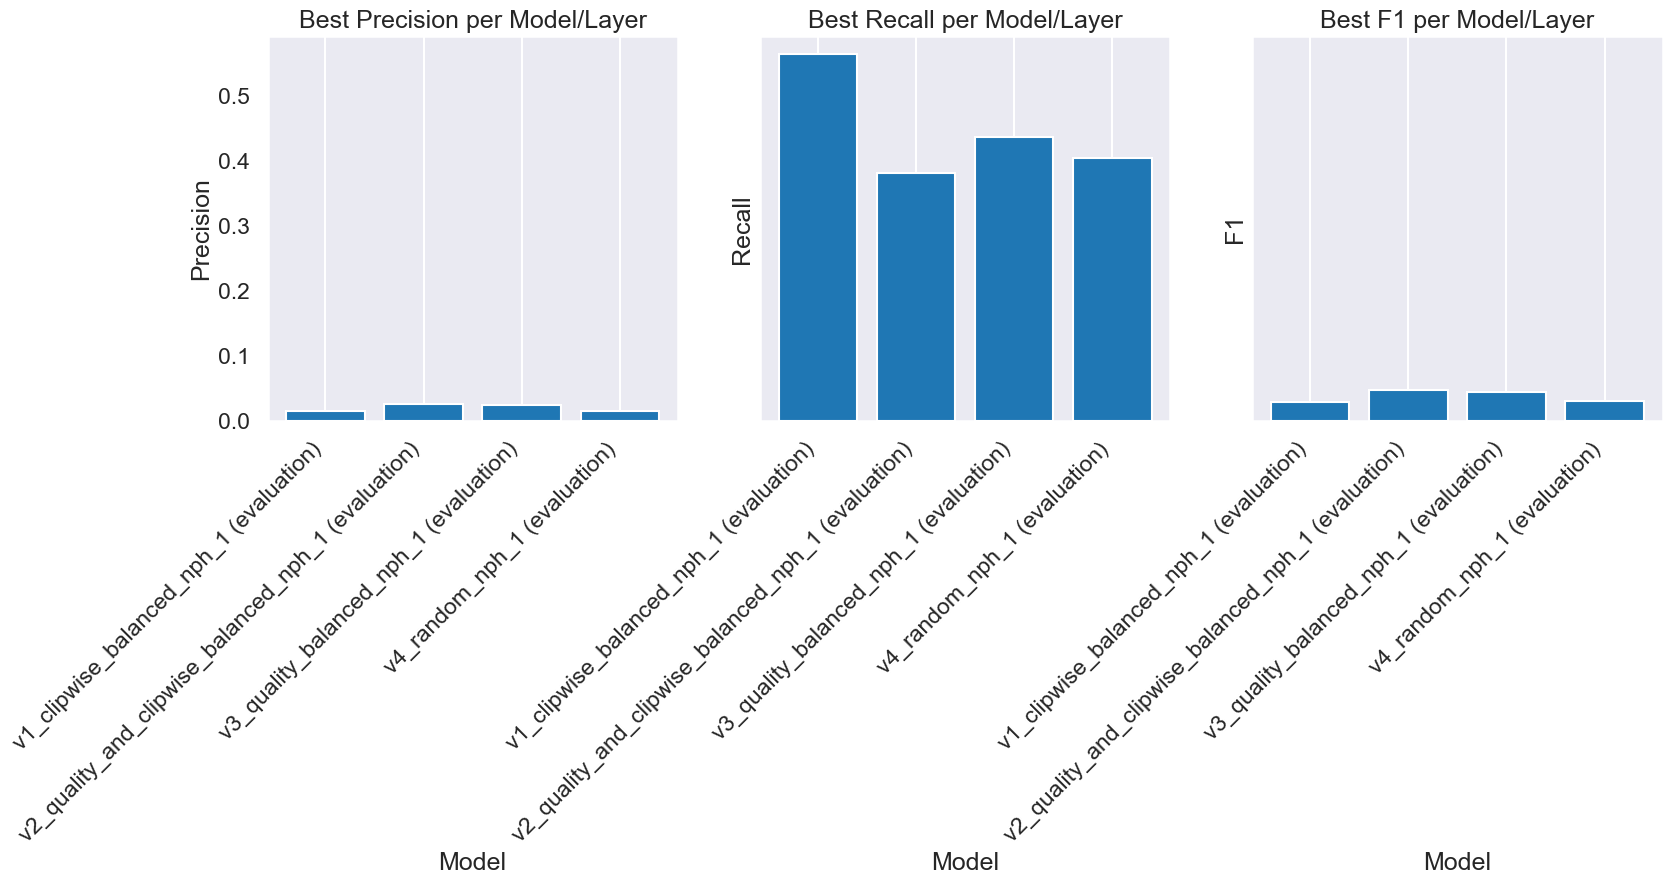

In [81]:
# Bars for the best F1 per model/layer
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

_bar_by_model(axes[0], best_precision, y="precision", title="Best Precision per Model/Layer")
_bar_by_model(axes[1], best_recall,    y="recall",    title="Best Recall per Model/Layer")
_bar_by_model(axes[2], best_f1,        y="f1",        title="Best F1 per Model/Layer")

plt.tight_layout()
plt.show()

/var/folders/yy/mfzpfh1n7vsdd7qnk0wl69700000gn/T/ipykernel_42570/3311031867.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


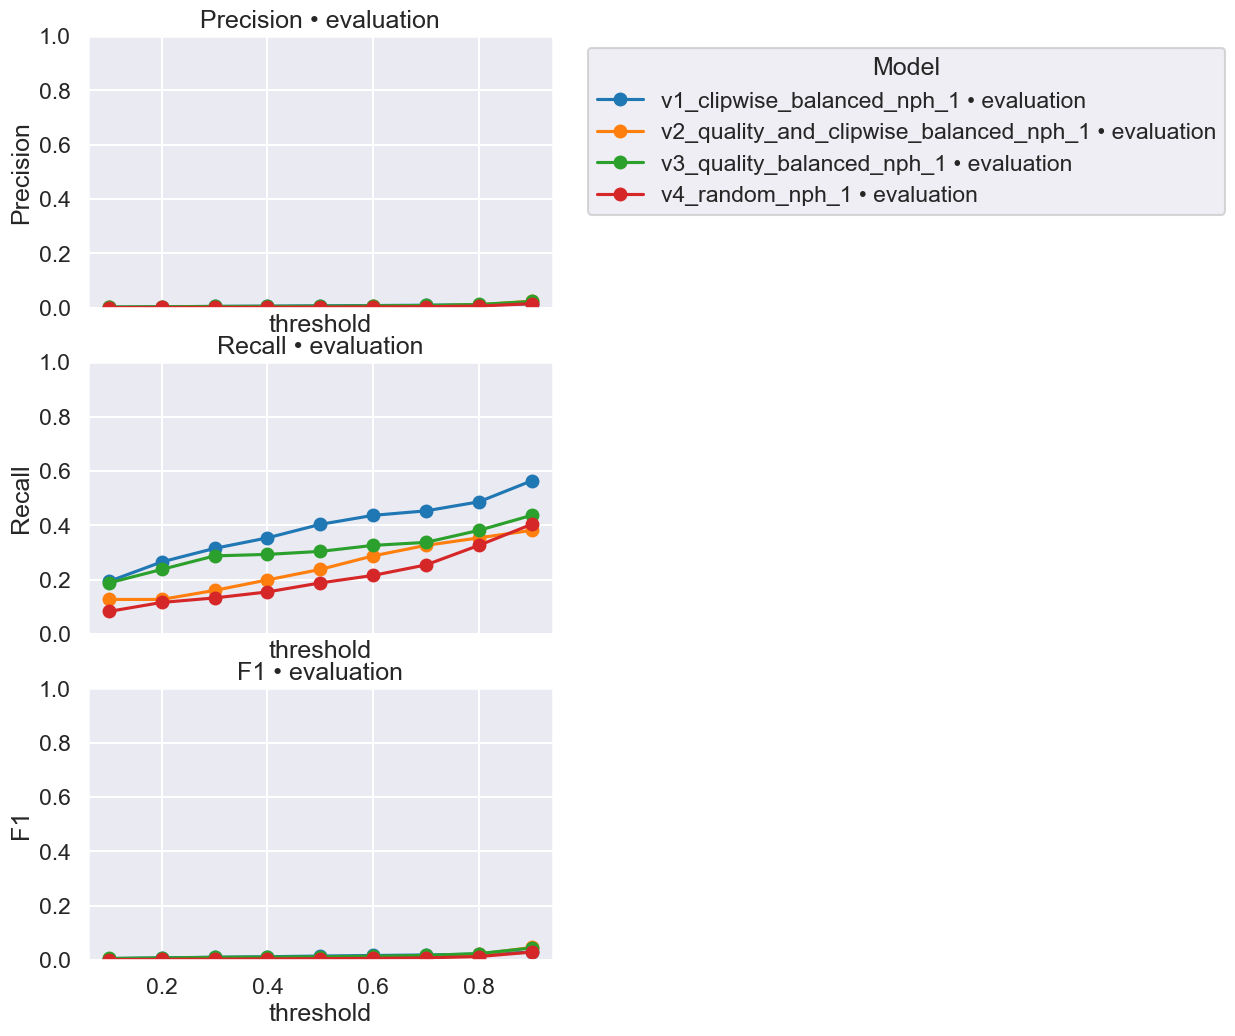

In [82]:
if "layer" in df.columns:
    layers = natsorted(df["layer"].unique().tolist())
    metrics = ["precision", "recall", "f1"]
    fig, axes = plt.subplots(len(metrics), len(layers), figsize=(6*len(layers), 4*len(metrics)), sharex=True, sharey=True)
    if axes.ndim == 1:
        axes = axes[:, None]
    for i, m in enumerate(metrics):
        for j, layer in enumerate(layers):
            ax = axes[i, j]
            _line_per_model_or_layer(ax, df[df["layer"] == layer], y=m, title=f"{m.capitalize()} • {layer}", share_ylim=(0,1))
            if i == 0:
                ax.legend(title="Model", bbox_to_anchor=(1.05,1), loc="upper left")
    plt.tight_layout()
    plt.show()